# Summary report of the COVID-19 testing at ILRI
## Objective
To generate data viz and summary statistics for all the samples tested within the ILRI testing labs for reporting purposes

## Number of samples analysed per county

In [80]:
import fileinput, glob, pandas as pd, time, datetime
from datetime import date

files = glob.iglob("/home/ouso/Documents/CleanedCovSampleFiles/*.xlsx", recursive=False)
COUNTY_OF_RESIDENCE = []
for file in files:
    #print(file)
    data = pd.read_excel(file, header=1)
    data.columns = data.columns.str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.strip()
    #if "COUNTY_OF_RESIDENCE" not in data.columns:
    #print(file)
    #else: pass
    COUNTY_OF_RESIDENCE.extend(list(data.COUNTY_OF_RESIDENCE))
    
countyData = pd.DataFrame({"COUNTY_OF_RESIDENCE":COUNTY_OF_RESIDENCE})
countyData.COUNTY_OF_RESIDENCE = countyData.COUNTY_OF_RESIDENCE.str.title().str.strip()


Total number of samples ran by 18-12-2020 are 22249 from 47 counties, represented by: 

COUNTY_OF_RESIDENCE
Nairobi                8234
Kiambu                 4719
Mombasa                3990
Nakuru                 1162
Laikipia               1055
Nyeri                   711
Garissa                 585
Kajiado                 494
Machakos                277
Murang`A                236
Kitui                   235
Kwale                    58
Nyandarua                53
Makueni                  45
Mandera                  39
Kirinyaga                39
Uasin Gishu              39
Nil                      32
Isiolo                   31
Meru                     31
Narok                    29
Kakamega                 25
Kericho                  15
Samburu                  13
Bungoma                  13
Kilifi                   11
Embu                     11
Kisii                    10
Tana River                8
Busia                     7
Kisumu                    6
Nandi                   

<AxesSubplot:xlabel='Counties', ylabel='Number of Samples'>

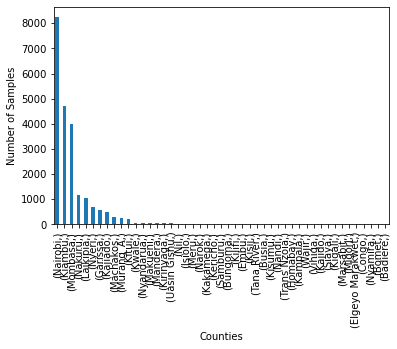

In [81]:
n_counties = countyData.nunique()[-1]
counts=countyData.value_counts()
t_samples = counts.sum()
today = date.today().strftime('%d-%m-%Y')
print("Total number of samples ran by {} are {} from {} counties, represented by: \n\n{}\n".format(today,t_samples, n_counties, counts))
print("A summary plot is show below:\n")
counts.plot.bar(xlabel="Counties", ylabel="Number of Samples")